In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

In [2]:
### 3.5. Clustering
#### 3.5.1 k-Means clusterin


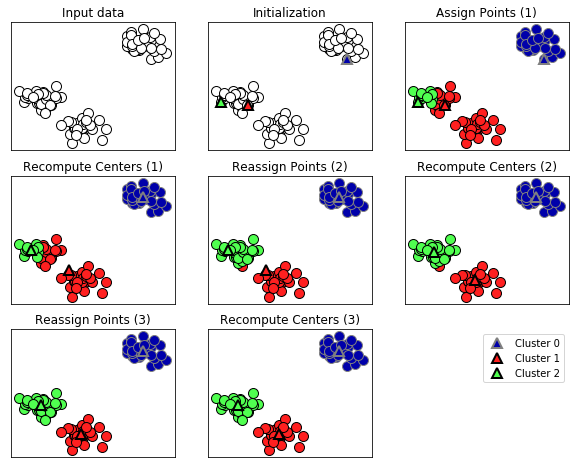

In [3]:
mglearn.plots.plot_kmeans_algorithm()

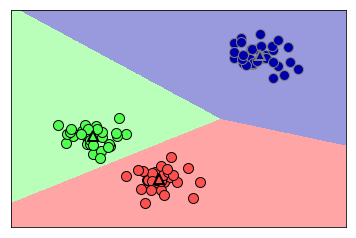

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
print(X[0], X[1], X[2])
print(y[0], y[1], y[2])

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

[-0.794  2.105] [-9.152 -4.813] [-11.442  -4.458]
0 1 1


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [7]:
print("Cluster memberships:\n{}".format(kmeans.predict(X)))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


[[ -1.471   4.337]
 [ -6.582  -8.172]
 [-10.049  -3.86 ]]


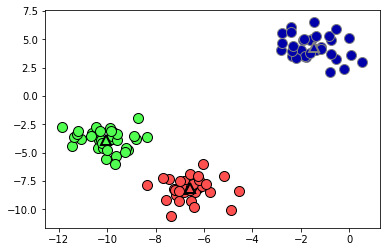

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

print(kmeans.cluster_centers_)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

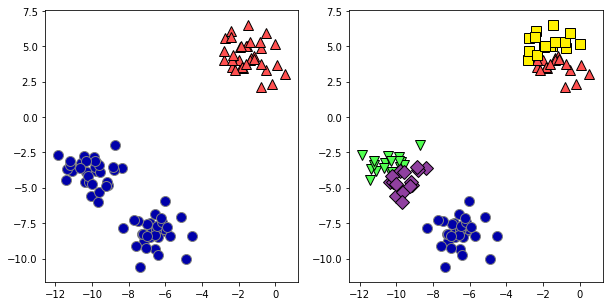

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### Failure cases of k-Means

- k-Means는 클러스터 중심 사이에 정확히 중간에 Decision Boundary를 긋는다.
- fit_predict
  - 훈련 데이터 셋트로 클러스터를 구성하고 각 데이터 포인트마다 구성된 클러스터의 소속 정보를 얻기 위한 함수

Text(0,0.5,'Feature 1')

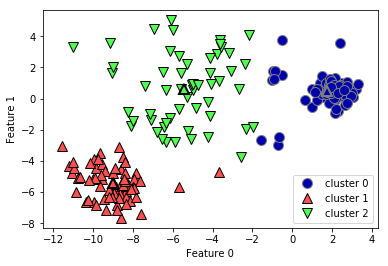

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0)

y_pred = kmeans.fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [11]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
print(transformation)
X = np.dot(X, transformation)

[[ 0.608 -0.637]
 [-0.409  0.853]]


Text(0,0.5,'Feature 1')

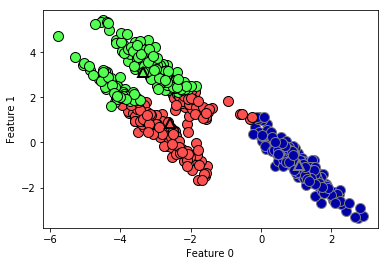

In [12]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=2
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

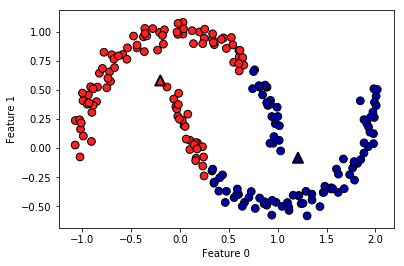

In [13]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker='^', 
    c=[mglearn.cm2(0), mglearn.cm2(1)], 
    s=100, 
    linewidth=2,
    edgecolor='k'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Vector Quantization (or Seeing k-Means as Decomposition)
- k-Means는 각 클러스터들의 중심이 해당 클러스터에 속한 데이터들을 대표한다고 간주할 수 있음
- 이렇게 각각의 데이터가 하나의 요소로 요약되는 상황을 Vector Quantization (벡터 양자화)라고 함
- [Note] Quantization
  - In mathematics and digital signal processing, it is the process of mapping input values from a large set (often a continuous set) to output values in a (countable) smaller set. 
- [Note] Vector Quantization
  - It works by mapping a large set of points (vectors) into groups having approximately the same number of points closest to them. 

[ 0] Gloria Macapagal Arroyo  44   [ 1] Tiger Woods              23   np.where(people.target == 0):
(array([ 0,  1,  2,  3,  5,  7,  9, 10, 12, 13, 15, 17, 18, 19, 21, 23, 24,
       26, 28, 29, 30, 31, 33, 36, 37, 38, 39, 41, 42, 45, 46, 47, 49, 50,
       51, 53, 54, 56, 58, 59, 60, 62, 63, 65], dtype=int64),)

np.where(people.target == 1):
(array([ 4,  6,  8, 11, 14, 16, 20, 22, 25, 27, 32, 34, 35, 40, 43, 44, 48,
       52, 55, 57, 61, 64, 66], dtype=int64),)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

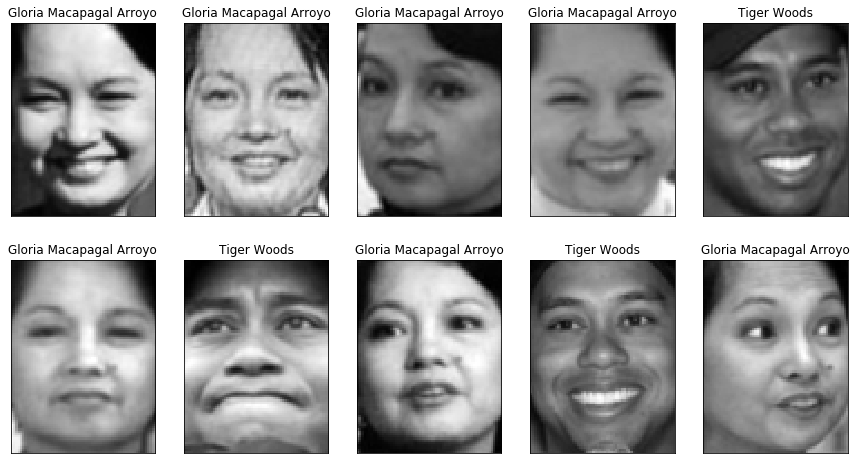

In [20]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape


fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

counts = np.bincount(people.target)

# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i, name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

mask = np.zeros(people.target.shape, dtype=np.bool)   
for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 값을 0~1 사이의 값으로 변환 --> 그레이 스케일로 변환
X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier

# split the data in training and test set
# stratify parameter makes a split so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
# train_test_split은 훈련 데이터와 테스트 데이터를 기본적으로 75%:25%로 나눔

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (50, 5655)
y_train.shape: (50,)
X_test.shape: (17, 5655)
y_test.shape: (17,)


In [26]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
print("pca.transform(X_test).shape: {}".format(pca.transform(X_test).shape))
print("X_reconstructed_pca.shape: {}".format(X_reconstructed_pca.shape))

print()

#100개의 중심들 중(kmeans.cluster_centers_)에서 
#kmeans.predict(X_test)에 의한 총 494개의 클러스터 Index에 해당하는 것들로만
#494번 k-Means 중심들을 추출하여 X_reconstructed_kmeans에 저장  
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
print("kmeans.predict(X_test).shape: {}".format(kmeans.predict(X_test).shape))
print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("X_reconstructed_kmeans.shape: {}".format(X_reconstructed_kmeans.shape))

print()

X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
print("nmf.transform(X_test).shape: {}".format(nmf.transform(X_test).shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))
print("X_reconstructed_nmf.shape: {}".format(X_reconstructed_nmf.shape))

IndexError: index 50 is out of bounds for axis 1 with size 50

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

print("kmeans.cluster_centers_.shape: {}".format(kmeans.cluster_centers_.shape))
print("pca.components_.shape: {}".format(pca.components_.shape))
print("nmf.components_.shape: {}".format(nmf.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, 
        kmeans.cluster_centers_, 
        pca.components_, 
        nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T,
        X_test,
        X_reconstructed_kmeans,
        X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

kmeans.cluster_centers_.shape: (2, 2)


AttributeError: 'PCA' object has no attribute 'components_'

- k-Means로 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있음

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


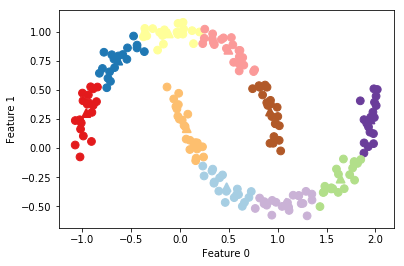

In [32]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=60,
    marker='^', 
    c=range(kmeans.n_clusters), 
    linewidth=2, 
    cmap='Paired'
)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [33]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.922 1.466 1.14  ... 1.166 1.039 0.233]
 [1.142 2.517 0.12  ... 0.707 2.204 0.983]
 [0.788 0.774 1.749 ... 1.971 0.716 0.944]
 ...
 [0.446 1.106 1.49  ... 1.791 1.032 0.812]
 [1.39  0.798 1.981 ... 1.978 0.239 1.058]
 [1.149 2.454 0.045 ... 0.572 2.113 0.882]]


In [34]:
- 대규모 데이터에 대한 k-Means 적용방법
  - MiniBatchKMeans 사용
    - batch_size의 기본 값: 100
    - 전체 데이터에서 100개를 임의로 선택하여 클러스터 중심 계산
    - k-Means의 단점
  - 난수 초기화에 따라 k-Means 클러스터링 결과 달라짐
    - scikit-learn의 대처 방법
      - 10개의 서로 다른 난수 초기값을 적용하여 k-Means를 수행하고 각 결과에서 산출되는 클러스터 분산의 합이 작은 것을 최종 결과로 택함
  - 클러스의 모양이 제한적
    - 클러스터 경계가 각 클러스터 중심에서 동일한 거리에 존재
  - 사용자가 클러스터의 개수를 직접 지정

SyntaxError: invalid syntax (<ipython-input-34-d4cd8c37d0c7>, line 1)